# Projet 9 : Produisez une étude de marché avec R ou Python

## 1. Importation des librairies

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from sklearn.metrics import silhouette_score
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

## 2. Importation et modifications des données

In [95]:
# Importer le fichier population 

population = pd.read_csv('Population_2000_2018.csv')
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [96]:
# Population multiplié par 1000 pour plus de lisibilité 
# Calculer une nouvelle variable pour notre analyse : la croissance démographique sur 5 ans en % entre 2012 et 2017

population["Valeur"] = population["Valeur"]*1000
population_nv=population.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur')
population_nv['Croissance démographique (%)']=(population_nv[2017]-population_nv[2012]) /(population_nv[2000])
population_nv.head()

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Croissance démographique (%)
Zone,,,,,,,,,,,,,,,,,,,,
Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0,0.247101
Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0,0.092891
Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0,-0.009564
Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0,0.129027
Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0,0.020710


In [97]:
# Conserver uniquement la colonne 2018 et la colonne croissance démographique pour notre analyse

population_1 = population_nv.loc[:, ['Croissance démographique (%)', 2018]]
population_1.head()

Année,Croissance démographique (%),2018
Zone,,
Afghanistan,0.247101,37171921.0
Afrique du Sud,0.092891,57792518.0
Albanie,-0.009564,2882740.0
Algérie,0.129027,42228408.0
Allemagne,0.020710,83124418.0


In [98]:
population_1.shape

(238, 2)

In [99]:
# 11 valeurs nulles que nous traiterons au moment des jointures
population_1.isnull().sum()

Année
Croissance démographique (%)    11
2018                             2
dtype: int64

In [100]:
# Filtrer les lignes avec au moins une valeur nulle
null_rows = population_1[population_1.isnull().any(axis=1)]

# Afficher les lignes avec des valeurs nulles
print(null_rows)

Année                                Croissance démographique (%)        2018
Zone                                                                         
Bonaire, Saint-Eustache et Saba                               NaN     25711.0
Curaçao                                                       NaN    162752.0
Monténégro                                                    NaN    627809.0
Saint-Barthélemy                                              NaN      9816.0
Saint-Martin (partie française)                               NaN     37264.0
Serbie                                                        NaN   8802754.0
Serbie-et-Monténégro                                          NaN         NaN
Sint Maarten  (partie néerlandaise)                           NaN     41940.0
Soudan                                                        NaN  41801533.0
Soudan (ex)                                                   NaN         NaN
Soudan du Sud                                                 Na

In [101]:
# Importer le fichier disponibilité_alimentaire_2017 au format csv

disponibilité_alim_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
disponibilité_alim_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [102]:
# Afficher uniquement les colonnes dont nous avons besoin pour notre analyse

dispo_2017=disponibilité_alim_2017.loc[:,['Zone','Élément','Produit','Valeur']]
dispo_2017.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [103]:
# aucune valeur manquante
dispo_2017.isnull().sum()

Zone       0
Élément    0
Produit    0
Valeur     0
dtype: int64

In [104]:
# Vérifier les types de valeurs
dispo_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Zone     176600 non-null  object 
 1   Élément  176600 non-null  object 
 2   Produit  176600 non-null  object 
 3   Valeur   176600 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


In [105]:
# Conserver uniquement les données concernant le produit 'Viande de Volailles' pour notre analyse

dispo_viande_volaille = dispo_2017.loc[dispo_2017['Produit']==  'Viande de Volailles']
dispo_viande_volaille.head()

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.0
653,Afghanistan,Variation de stock,Viande de Volailles,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.0
655,Afghanistan,Pertes,Viande de Volailles,2.0


In [106]:
dispo_viande_volaille.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 651 to 176400
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     2061 non-null   object 
 1   Élément  2061 non-null   object 
 2   Produit  2061 non-null   object 
 3   Valeur   2061 non-null   float64
dtypes: float64(1), object(3)
memory usage: 80.5+ KB


In [107]:
# Faire un pivot de la colonne Élément et vérifier le nombre de valeurs nulles par colonne

v_v=dispo_viande_volaille.pivot_table(index='Zone', columns='Élément', values = 'Valeur')
v_v.isnull().sum()

Élément
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                  

In [108]:
# Les variables que nous utiliserons pour nos analyses sont les disponibilités, l'exportation, l'importation, et la production
# Remplacer les valeurs nulles des colonnes par leurs moyennes

v_v=dispo_viande_volaille.pivot_table(index='Zone', columns='Élément', values = 'Valeur').fillna(v_v.mean())
v_v.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0


### 2.1 La création de nouvelles variables pour notre analyse

#### DISPONIBILITE INTERIEUR = Production + importations - exportations + variations des stocks (baisse ou augmentation)

### 2.2 Une variable du taux d'auto-suffisance dans le pays

#### Taux d'auto-suffisance (TAS) = (Production ÷ Disponibilité intérieure) x 100

### 2.3 Une variable du taux de dépendance à l'importation dans le pays

#### Taux de dépendance aux importations (TDI) = (Importation ÷ Disponibilité intérieure) x 100

### 2.4 L'objectif de ces variables

#### Plus le TDI est élevé plus la dépendance du pays à l'importation est forte en consommation de volailles
#### Plus le TAS est élevé plus le pays est auto-suffisant en consommation de vollailles
### Nous rechercherons donc des pays avec un TAS faible et un TDI elevé.

In [109]:
# calculer les 2 nouvelles variables le TDI et le TAS

v_v['TDI (%)']=(v_v['Importations - Quantité']/v_v['Disponibilité intérieure'])*100
v_v['TAS (%)']=(v_v['Production']/v_v['Disponibilité intérieure'])*100
v_v.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,TDI (%),TAS (%)
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0,50.877193,49.122807
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0,24.268178,78.706327
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0,80.851064,27.659574
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0,0.722022,99.277978
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0,48.418631,87.061530


In [110]:
# Nouveau dataset avec les colonnes à utiliser pour les jointures et pour notre analyse

Dataset = v_v.loc[:,['Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité intérieure','TAS (%)','TDI (%)','Exportations - Quantité','Importations - Quantité']]
Dataset.rename(columns ={"Disponibilité alimentaire (Kcal/personne/jour)": "Disp_alim_Kcal/per/jour","Disponibilité de protéines en quantité (g/personne/jour)": "Disp_prot_g/per/jour","Disponibilité alimentaire en quantité (kg/personne/an)":"Disp_quanti_kg/per/an" }, inplace= True)
Dataset.head()

Élément,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,57.0,49.122807,50.877193,132.185185,29.0
Afrique du Sud,35.69,143.0,14.11,2118.0,78.706327,24.268178,63.000000,514.0
Albanie,16.36,85.0,6.26,47.0,27.659574,80.851064,0.000000,38.0
Algérie,6.38,22.0,1.97,277.0,99.277978,0.722022,0.000000,2.0
Allemagne,19.47,71.0,7.96,1739.0,87.061530,48.418631,646.000000,842.0


In [111]:
# Importation du fichier Stabilité Politique.csv
Stab_Pol = pd.read_csv('Stab_Politique.csv')
Stab_Pol.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,indice,1.76,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,indice,1.30,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2003,2003,indice,1.16,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2004,2004,indice,1.02,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,150,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2005,2005,indice,0.99,X,Ciffre de sources internationales,NaN


In [112]:
# Garder uniquement les colonnes neccéssaires à notre analyse 
Stab_Pol1=Stab_Pol.loc[:,['Zone','Année','Valeur']]
Stab_Pol1.head()

,Zone,Année,Valeur
0,Pays-Bas (Royaume des),2000,1.76
1,Pays-Bas (Royaume des),2002,1.30
2,Pays-Bas (Royaume des),2003,1.16
3,Pays-Bas (Royaume des),2004,1.02
4,Pays-Bas (Royaume des),2005,0.99


In [113]:
# Garder l'année la plus récente puis retirer la colonne année.
Stab_Pol2 = Stab_Pol1.loc[Stab_Pol1['Année'] == 2021]
Stab_Pol2.drop(columns=['Année'], inplace=True)
Stab_Pol2.head()

,Zone,Valeur
20,Pays-Bas (Royaume des),0.92
41,Afghanistan,-2.53
62,Afrique du Sud,-0.71
83,Albanie,0.11
104,Algérie,-0.88


In [114]:
Stab_Pol2.shape

(196, 2)

In [115]:
# 0 valeurs nulles
Stab_Pol2.isnull().sum()

Zone      0
Valeur    0
dtype: int64

In [116]:
# Importation du fichier pib_2017.csv

pib = pd.read_csv('pib_2017.csv')
pib.head()

,Zone,Pib (%)
0,Afghanistan,3.0
1,Afrique du Sud,17.0
2,Albanie,9.0
3,Algérie,6.0
4,Allemagne,6.0


In [117]:
# lignes et colonnes
pib.shape

(219, 2)

In [118]:
# 8 valeurs nulles que nous traiterons également au moment des jointures
pib.isnull().sum()

Zone       0
Pib (%)    8
dtype: int64

## 3. Les Jointures entre les différents fichiers

In [119]:
# Effectuer la première jointure entre le dataset résulant de population avec celui des disponibilités alimentaires

jointure1=Dataset.merge(population_1,on='Zone',how='inner')
jointure1.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),2018
Zone,,,,,,,,,,
Afghanistan,1.53,5.0,0.54,57.0,49.122807,50.877193,132.185185,29.0,0.247101,37171921.0
Afrique du Sud,35.69,143.0,14.11,2118.0,78.706327,24.268178,63.000000,514.0,0.092891,57792518.0
Albanie,16.36,85.0,6.26,47.0,27.659574,80.851064,0.000000,38.0,-0.009564,2882740.0
Algérie,6.38,22.0,1.97,277.0,99.277978,0.722022,0.000000,2.0,0.129027,42228408.0
Allemagne,19.47,71.0,7.96,1739.0,87.061530,48.418631,646.000000,842.0,0.020710,83124418.0


In [120]:
# Effectuer la deuxième jointure avec le dataframe Stabilité Politique 

jointure2=jointure1.merge(Stab_Pol2,on='Zone',how='inner')
jointure2 =jointure2.fillna(jointure2.mean())
jointure2.set_index('Zone', inplace = True)
jointure2.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),2018,Valeur
Zone,,,,,,,,,,,
Afghanistan,1.53,5.0,0.54,57.0,49.122807,50.877193,132.185185,29.0,0.247101,37171921.0,-2.53
Afrique du Sud,35.69,143.0,14.11,2118.0,78.706327,24.268178,63.000000,514.0,0.092891,57792518.0,-0.71
Albanie,16.36,85.0,6.26,47.0,27.659574,80.851064,0.000000,38.0,-0.009564,2882740.0,0.11
Algérie,6.38,22.0,1.97,277.0,99.277978,0.722022,0.000000,2.0,0.129027,42228408.0,-0.88
Allemagne,19.47,71.0,7.96,1739.0,87.061530,48.418631,646.000000,842.0,0.020710,83124418.0,0.76


In [121]:
# Effectuer la troisième jointure avec le dataset pib 2017  
jointure_finale =jointure2.merge(pib,on='Zone',how='inner')
jointure_finale =jointure_finale.fillna(jointure_finale.mean())
jointure_finale.set_index('Zone', inplace = True)
jointure_finale.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),2018,Valeur,Pib (%)
Zone,,,,,,,,,,,,
Afghanistan,1.53,5.0,0.54,57.0,49.122807,50.877193,132.185185,29.0,0.247101,37171921.0,-2.53,3.0
Afrique du Sud,35.69,143.0,14.11,2118.0,78.706327,24.268178,63.000000,514.0,0.092891,57792518.0,-0.71,17.0
Albanie,16.36,85.0,6.26,47.0,27.659574,80.851064,0.000000,38.0,-0.009564,2882740.0,0.11,9.0
Algérie,6.38,22.0,1.97,277.0,99.277978,0.722022,0.000000,2.0,0.129027,42228408.0,-0.88,6.0
Allemagne,19.47,71.0,7.96,1739.0,87.061530,48.418631,646.000000,842.0,0.020710,83124418.0,0.76,6.0


In [122]:
# Renommer les colonnes necessaires

jointure_finale = jointure_finale.rename(columns = {"Valeur":"Stab Politique", 2018:"Population"})
jointure_finale.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Afghanistan,1.53,5.0,0.54,57.0,49.122807,50.877193,132.185185,29.0,0.247101,37171921.0,-2.53,3.0
Afrique du Sud,35.69,143.0,14.11,2118.0,78.706327,24.268178,63.000000,514.0,0.092891,57792518.0,-0.71,17.0
Albanie,16.36,85.0,6.26,47.0,27.659574,80.851064,0.000000,38.0,-0.009564,2882740.0,0.11,9.0
Algérie,6.38,22.0,1.97,277.0,99.277978,0.722022,0.000000,2.0,0.129027,42228408.0,-0.88,6.0
Allemagne,19.47,71.0,7.96,1739.0,87.061530,48.418631,646.000000,842.0,0.020710,83124418.0,0.76,6.0


In [123]:
jointure_finale.info()
jointure_finale.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, Afghanistan to Îles Salomon
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Disp_quanti_kg/per/an         166 non-null    float64
 1   Disp_alim_Kcal/per/jour       166 non-null    float64
 2   Disp_prot_g/per/jour          166 non-null    float64
 3   Disponibilité intérieure      166 non-null    float64
 4   TAS (%)                       166 non-null    float64
 5   TDI (%)                       166 non-null    float64
 6   Exportations - Quantité       166 non-null    float64
 7   Importations - Quantité       166 non-null    float64
 8   Croissance démographique (%)  166 non-null    float64
 9   Population                    166 non-null    float64
 10  Stab Politique                166 non-null    float64
 11  Pib (%)                       166 non-null    float64
dtypes: float64(12)
memory usage: 16.9+ KB


,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000
mean,19.906506,73.463855,7.011627,592.145712,258.699117,44.821917,124.106426,85.114812,0.096926,3.584445e+07,-0.082892,7.240964
std,15.895120,60.899186,5.619121,1741.826018,1924.449881,51.286266,450.327040,181.978634,0.094703,1.138119e+08,0.901163,6.923111
min,0.130000,0.000000,0.040000,2.000000,0.000000,0.000000,0.000000,0.000000,-0.067565,5.244100e+04,-2.590000,-27.000000
25%,6.087500,20.500000,1.970000,32.000000,40.731707,4.447723,0.000000,3.000000,0.027452,2.895767e+06,-0.640000,5.000000
50%,17.325000,62.000000,6.300000,100.000000,88.846154,24.255301,8.500000,16.000000,0.075607,9.669229e+06,-0.100000,7.000000
75%,29.242500,104.000000,10.057500,353.250000,100.000000,79.261789,132.185185,81.250000,0.150932,3.134847e+07,0.667500,10.000000
max,72.310000,243.000000,27.870000,18266.000000,24173.015873,323.928571,4223.000000,1069.000000,0.514953,1.352642e+09,1.440000,36.000000


## 4. Detection des Outliers

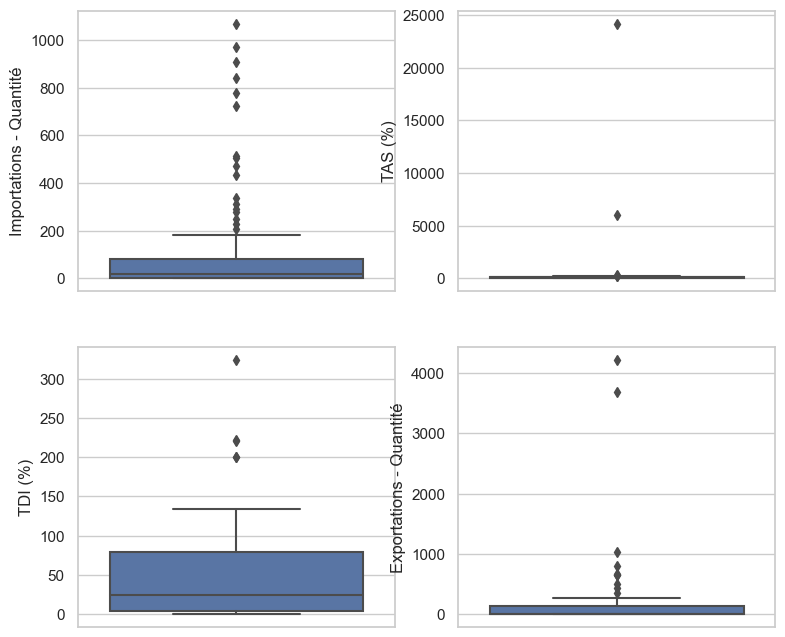

In [124]:
# Affichage des boxplot pour chaque variable

plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=jointure_finale,y='Importations - Quantité')
plt.subplot(222)
sns.boxplot(data=jointure_finale, y='TAS (%)')
plt.subplot(223)
sns.boxplot(data=jointure_finale,y='TDI (%)')
plt.subplot(224)
sns.boxplot(data=jointure_finale,y='Exportations - Quantité')
plt.savefig('Distribution de l\'ensemble variables.jpg')

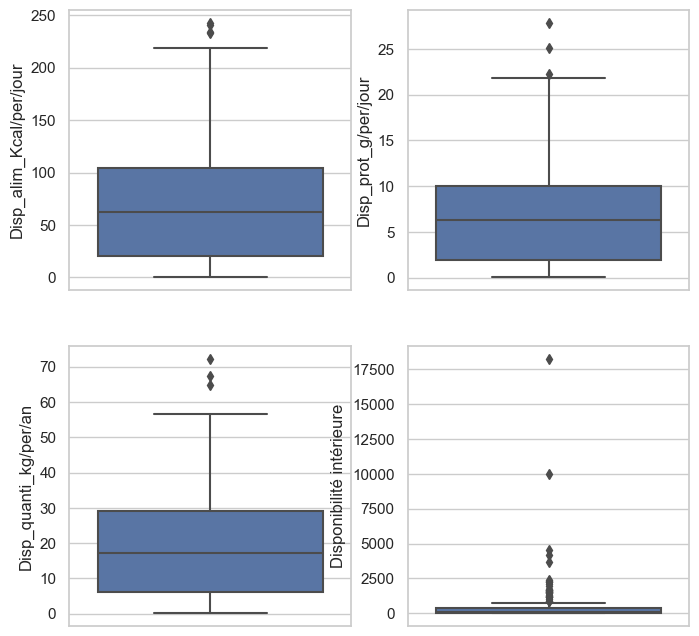

In [125]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=jointure_finale,  y='Disp_alim_Kcal/per/jour')
plt.subplot(222)
sns.boxplot(data=jointure_finale,  y='Disp_prot_g/per/jour')
plt.subplot(223)
sns.boxplot(data=jointure_finale,  y='Disp_quanti_kg/per/an')
plt.subplot(224)
sns.boxplot(data=jointure_finale,  y='Disponibilité intérieure')
plt.savefig('Distribution de l\'ensemble variables_suite.jpg')

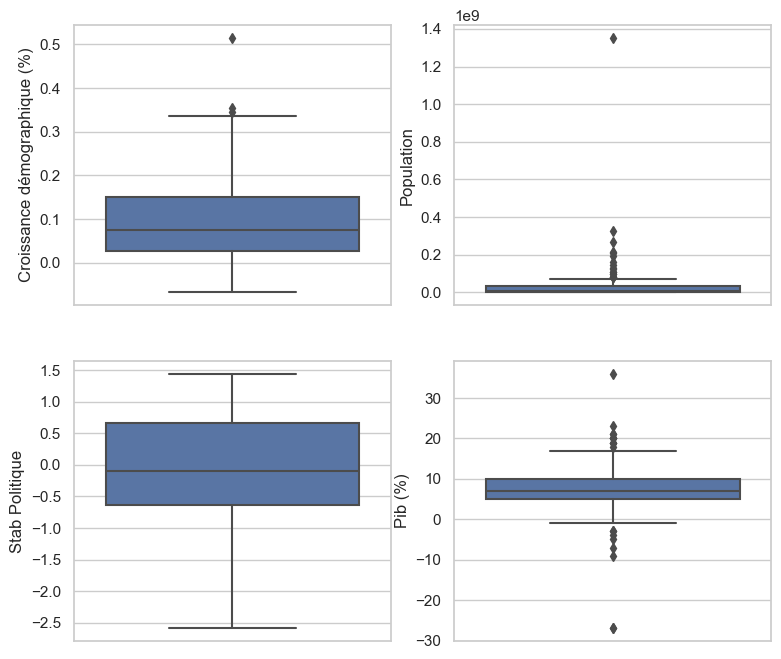

In [126]:
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=jointure_finale,y='Croissance démographique (%)')
plt.subplot(222)
sns.boxplot(data=jointure_finale, y='Population')
plt.subplot(223)
sns.boxplot(data=jointure_finale,y='Stab Politique')
plt.subplot(224)
sns.boxplot(data=jointure_finale,y='Pib (%)')
plt.savefig('Distribution de l\'ensemble variables.jpg')

### Conclusion : Il y a des Outliers dans toutes les variables sauf la stabilité politique. Nous allons les etudier variable par variable.

### 4.1 Outliers TDI

In [127]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['TDI (%)'].quantile(0.25)
Q3 = jointure_finale['TDI (%)'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_TDI = jointure_finale[(jointure_finale['TDI (%)'] < lower_bound) | (jointure_finale['TDI (%)'] > upper_bound)]

outliers_TDI = outliers_TDI.sort_values(by=['TDI (%)'], ascending=False)

# Afficher la liste des outliers
outliers_TDI.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Chine - RAS de Hong-Kong,53.51,210.0,22.26,280.0,8.571429,323.928571,663.000000,907.0,0.039277,7371730.0,0.26,6.0
Belgique,12.65,44.0,4.57,152.0,304.605263,222.368421,656.000000,338.0,0.032522,11482178.0,0.61,5.0
Timor-Leste,4.24,14.0,1.46,5.0,20.000000,220.000000,132.185185,11.0,0.124681,1267974.0,0.17,-3.0
Gambie,3.53,12.0,1.24,8.0,25.000000,200.000000,132.185185,16.0,0.234405,2280094.0,0.18,2.0
Îles Salomon,4.45,18.0,1.51,3.0,0.000000,200.000000,0.000000,6.0,0.193806,652857.0,0.49,7.0


### Conclusion : 
#### Un TDI elevé est un bon profil pour notre analyse mais un TAS elevé non.
#### Sur ces 5 Outliers nous supprimerons donc la Belgique avec un TAS à 300% et Hong Kong sous emprise chinoise.

### 4.2 Outliers TAS

In [128]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['TAS (%)'].quantile(0.25)
Q3 = jointure_finale['TAS (%)'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_TAS = jointure_finale[(jointure_finale['TAS (%)'] < lower_bound) | (jointure_finale['TAS (%)'] > upper_bound)]

outliers_TAS = outliers_TAS.sort_values(by=['TAS (%)'], ascending=False)

# Afficher la liste des outliers
outliers_TAS.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Djibouti,2.68,9.0,0.92,3.0,24173.015873,100.000000,132.185185,3.0,0.105858,958923.0,-0.71,5.0
Maldives,13.50,47.0,4.70,12.0,6043.253968,100.000000,132.185185,12.0,0.354924,515696.0,0.50,8.0
Belgique,12.65,44.0,4.57,152.0,304.605263,222.368421,656.000000,338.0,0.032522,11482178.0,0.61,5.0
Pologne,30.30,107.0,12.14,1156.0,203.373702,4.757785,1025.000000,55.0,-0.007103,37921592.0,0.51,11.0
Thaïlande,12.95,47.0,4.35,881.0,190.238365,0.227015,796.000000,2.0,0.021824,69428453.0,-0.55,10.0


### Conclusion : 
#### Un TAS elevé est un mauvais profil pour notre analyse
#### Sur ces 5 Outliers nous les supprimerons tous.

### 4.3 Outliers Disp_quanti_kg/per/an

In [129]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Disp_quanti_kg/per/an'].quantile(0.25)
Q3 = jointure_finale['Disp_quanti_kg/per/an'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_DQK = jointure_finale[(jointure_finale['Disp_quanti_kg/per/an'] < lower_bound) | (jointure_finale['Disp_quanti_kg/per/an'] > upper_bound)]

outliers_DQK = outliers_DQK.sort_values(by=['Disp_quanti_kg/per/an'], ascending=False)

# Afficher la liste des outliers
outliers_DQK.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Saint-Vincent-et-les Grenadines,72.31,243.0,25.10,8.0,0.000000,112.500000,132.185185,9.0,0.012915,110211.0,1.04,2.0
Israël,67.39,234.0,27.87,636.0,98.899371,0.000000,3.000000,0.0,0.105769,8381516.0,-1.06,10.0
Samoa,64.77,217.0,21.88,15.0,0.000000,113.333333,0.000000,17.0,0.035901,196129.0,1.11,0.0


### Conclusion : 
#### Une Disp_quanti_kg/per/an elevé est un mauvais profil pour notre analyse
#### Sur ces 3 Outliers nous les supprimerons tous : Saint-Vincent-et-les Grenadines et Samoa ont une population très faible et Israel a un TAS à 99%

### 4.4 Outliers Disp_alim_Kcal/per/jour

In [130]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Disp_alim_Kcal/per/jour'].quantile(0.25)
Q3 = jointure_finale['Disp_alim_Kcal/per/jour'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_DAK = jointure_finale[(jointure_finale['Disp_alim_Kcal/per/jour'] < lower_bound) | (jointure_finale['Disp_alim_Kcal/per/jour'] > upper_bound)]

outliers_DAK = outliers_DAK.sort_values(by=['Disp_alim_Kcal/per/jour'], ascending=False)

# Afficher la liste des outliers
outliers_DAK.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Saint-Vincent-et-les Grenadines,72.31,243.0,25.10,8.0,0.000000,112.500000,132.185185,9.0,0.012915,110211.0,1.04,2.0
Sainte-Lucie,56.69,241.0,19.00,11.0,9.090909,90.909091,132.185185,10.0,0.027487,181889.0,0.85,7.0
Israël,67.39,234.0,27.87,636.0,98.899371,0.000000,3.000000,0.0,0.105769,8381516.0,-1.06,10.0
Antigua-et-Barbuda,54.10,233.0,17.77,7.0,0.000000,100.000000,0.000000,7.0,0.065999,96286.0,0.96,2.0


### Conclusion : 
#### Une Disp_alim_Kcal/per/jour elevé est un mauvais profil pour notre analyse
#### Sur ces 4 Outliers, 2 ont déja été detectés en amont, nous supprimerons les 2 autres : Sainte-Lucie et Antigua-et-Barbuda ont une population très faible.

### 4.5 Outliers Disp_prot_g/per/jour

In [131]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Disp_prot_g/per/jour'].quantile(0.25)
Q3 = jointure_finale['Disp_prot_g/per/jour'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_DPG = jointure_finale[(jointure_finale['Disp_prot_g/per/jour'] < lower_bound) | (jointure_finale['Disp_prot_g/per/jour'] > upper_bound)]

outliers_DPG = outliers_DPG.sort_values(by=['Disp_prot_g/per/jour'], ascending=False)

# Afficher la liste des outliers
outliers_DPG.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Israël,67.39,234.0,27.87,636.0,98.899371,0.000000,3.000000,0.0,0.105769,8381516.0,-1.06,10.0
Saint-Vincent-et-les Grenadines,72.31,243.0,25.10,8.0,0.000000,112.500000,132.185185,9.0,0.012915,110211.0,1.04,2.0
Chine - RAS de Hong-Kong,53.51,210.0,22.26,280.0,8.571429,323.928571,663.000000,907.0,0.039277,7371730.0,0.26,6.0


### Conclusion : 
#### Une Disp_prot_g/per/jour elevé est un mauvais profil pour notre analyse
#### Ces 3 Outliers ont déja été detectés plus haut.

### 4.6 Outliers Dispo Interieure

In [132]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Disponibilité intérieure'].quantile(0.25)
Q3 = jointure_finale['Disponibilité intérieure'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_DI = jointure_finale[(jointure_finale['Disponibilité intérieure'] < lower_bound) | (jointure_finale['Disponibilité intérieure'] > upper_bound)]

outliers_DI = outliers_DI.sort_values(by=['Disponibilité intérieure'], ascending=False)

# Afficher la liste des outliers
outliers_DI.head(40)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
États-Unis d'Amérique,55.68,219.0,19.93,18266.0,119.971532,0.673382,3692.0,123.0,0.039192,3.270963e+08,0.00,4.0
Brésil,48.03,204.0,15.68,9982.0,142.266079,0.030054,4223.0,3.0,0.048896,2.094693e+08,-0.49,14.0
Fédération de Russie,30.98,104.0,10.44,4556.0,97.541703,4.960492,115.0,226.0,0.010493,1.457340e+08,-0.65,23.0
Mexique,32.52,123.0,9.26,4219.0,77.008770,23.038635,9.0,972.0,0.075866,1.261908e+08,-0.64,7.0
Inde,2.22,7.0,0.75,3661.0,96.831467,0.000000,4.0,0.0,0.068993,1.352642e+09,-0.62,14.0
Japon,18.50,67.0,7.24,2415.0,91.718427,44.265010,10.0,1069.0,-0.007221,1.272022e+08,1.03,-1.0
Indonésie,7.19,25.0,2.42,2323.0,99.052949,0.043048,0.0,1.0,0.076587,2.676705e+08,-0.51,8.0
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,31.94,120.0,13.77,2234.0,81.199642,34.870188,359.0,779.0,0.037373,6.714168e+07,0.54,-1.0
Iran (République islamique d'),27.52,96.0,9.80,2220.0,97.927928,0.270270,45.0,6.0,0.078234,8.180019e+07,-1.62,8.0


### Conclusion : 
#### Une Dispo Intérieure elevé est un mauvais profil pour notre analyse
#### Mais nous trouvons des individus avec des TAS loin des 100% et des TDI loin des 0%
#### Nous supprimerons donc les individus avec une Dispo Interieure trop elevé associé à un TAS elevé (95% ou +) et TDI faible (5% ou moins) : 
#### Etats-Unis, Brésil, Inde, Russie, Indonésie, Iran, Argentine, Turquie, Myanmar (Birmanie), Colombie, Malaisie, Pakistan, Perou, Australie.

### 4.7 Outliers Importations - Quantité

In [133]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Importations - Quantité'].quantile(0.25)
Q3 = jointure_finale['Importations - Quantité'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_IQ = jointure_finale[(jointure_finale['Importations - Quantité'] < lower_bound) | (jointure_finale['Importations - Quantité'] > upper_bound)]

outliers_IQ = outliers_IQ.sort_values(by=['Importations - Quantité'], ascending=False)

# Afficher la liste des outliers
outliers_IQ.head(40)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Japon,18.50,67.0,7.24,2415.0,91.718427,44.265010,10.000000,1069.0,-0.007221,127202192.0,1.03,-1.0
Mexique,32.52,123.0,9.26,4219.0,77.008770,23.038635,9.000000,972.0,0.075866,126190788.0,-0.64,7.0
Chine - RAS de Hong-Kong,53.51,210.0,22.26,280.0,8.571429,323.928571,663.000000,907.0,0.039277,7371730.0,0.26,6.0
Allemagne,19.47,71.0,7.96,1739.0,87.061530,48.418631,646.000000,842.0,0.020710,83124418.0,0.76,6.0
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,31.94,120.0,13.77,2234.0,81.199642,34.870188,359.000000,779.0,0.037373,67141684.0,0.54,-1.0
Arabie saoudite,43.36,151.0,15.57,1435.0,42.926829,50.313589,10.000000,722.0,0.190975,33702756.0,-0.58,6.0
Afrique du Sud,35.69,143.0,14.11,2118.0,78.706327,24.268178,63.000000,514.0,0.092891,57792518.0,-0.71,17.0
France,22.90,92.0,8.95,1573.0,111.252384,32.167832,501.000000,506.0,0.021660,64990511.0,0.37,5.0
Iraq,14.95,52.0,5.37,566.0,16.961131,83.038869,0.000000,470.0,0.240994,38433600.0,-2.40,14.0


### Conclusion : 
#### Une Importation - Quantité elevé est un bon profil pour notre analyse car ils importent beaucoup.
#### Mais nous trouvons des individus avec des TAS proche de 100% et des TDI proche de 0%
#### Nous supprimerons donc les individus avec une Importation - Quantité elevé associé à un TAS elevé (95% ou +) et TDI faible (5% ou moins) : 
#### Fédération de Russie déja detecté sur la dispo interieure.

### 4.8 Outliers Exportations - Quantité

In [134]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Exportations - Quantité'].quantile(0.25)
Q3 = jointure_finale['Exportations - Quantité'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_EQ = jointure_finale[(jointure_finale['Exportations - Quantité'] < lower_bound) | (jointure_finale['Exportations - Quantité'] > upper_bound)]

outliers_EQ = outliers_EQ.sort_values(by=['Exportations - Quantité'], ascending=False)

# Afficher la liste des outliers
outliers_EQ.head(40)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Brésil,48.03,204.0,15.68,9982.0,142.266079,0.030054,4223.0,3.0,0.048896,209469323.0,-0.49,14.0
États-Unis d'Amérique,55.68,219.0,19.93,18266.0,119.971532,0.673382,3692.0,123.0,0.039192,327096265.0,0.00,4.0
Pologne,30.30,107.0,12.14,1156.0,203.373702,4.757785,1025.0,55.0,-0.007103,37921592.0,0.51,11.0
Thaïlande,12.95,47.0,4.35,881.0,190.238365,0.227015,796.0,2.0,0.021824,69428453.0,-0.55,10.0
Chine - RAS de Hong-Kong,53.51,210.0,22.26,280.0,8.571429,323.928571,663.0,907.0,0.039277,7371730.0,0.26,6.0
Belgique,12.65,44.0,4.57,152.0,304.605263,222.368421,656.0,338.0,0.032522,11482178.0,0.61,5.0
Allemagne,19.47,71.0,7.96,1739.0,87.061530,48.418631,646.0,842.0,0.020710,83124418.0,0.76,6.0
France,22.90,92.0,8.95,1573.0,111.252384,32.167832,501.0,506.0,0.021660,64990511.0,0.37,5.0
Turquie,20.64,71.0,6.99,1674.0,130.943847,0.179211,429.0,3.0,0.102236,82340088.0,-1.10,-1.0


### Conclusion : 
#### Une Exportation - Quantité elevé est un mauvais profil pour notre analyse car cela veut dire qu'ils produisent beaucoup.
#### Mais nous trouvons des individus avec des TAS loin de 100% et des TDI proche de 0%
#### Nous supprimerons les individus avec une Exportation - Quantité elevé associé à un TAS elevé (95% ou +) et TDI faible (5% ou moins) : 
#### Ces pays ont déja été detecté dans les Outliers précédents.

### 4.8 Outliers Croissance démographique (%)

In [135]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Croissance démographique (%)'].quantile(0.25)
Q3 = jointure_finale['Croissance démographique (%)'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_CD = jointure_finale[(jointure_finale['Croissance démographique (%)'] < lower_bound) | (jointure_finale['Croissance démographique (%)'] > upper_bound)]

outliers_CD = outliers_CD.sort_values(by=['Croissance démographique (%)'], ascending=False)

# Afficher la liste des outliers
outliers_CD.head()

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Oman,21.63,73.0,7.38,114.0,6.140351,110.526316,16.000000,126.0,0.514953,4829473.0,0.51,7.0
Maldives,13.50,47.0,4.70,12.0,6043.253968,100.000000,132.185185,12.0,0.354924,515696.0,0.50,8.0
Koweït,46.25,156.0,15.87,189.0,29.629630,72.486772,4.000000,137.0,0.345821,4137312.0,0.30,10.0


### Conclusion : 
#### Une Croissance démographique elevé est un bon profil pour notre analyse car cela veut dire que la population augmente.
#### Nous supprimerons que les individus avec une faible population (inférieure à 1M d'habitants) car peu de potentiel commercial : 
#### Les Maldives

### 4.9 Outliers Population

In [136]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Population'].quantile(0.25)
Q3 = jointure_finale['Population'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_POP = jointure_finale[(jointure_finale['Population'] < lower_bound) | (jointure_finale['Population'] > upper_bound)]

outliers_POP = outliers_POP.sort_values(by=['Population'], ascending=False)

# Afficher la liste des outliers
outliers_POP.head(20)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Inde,2.22,7.0,0.75,3661.0,96.831467,0.000000,4.000000,0.0,0.068993,1.352642e+09,-0.62,14.0
États-Unis d'Amérique,55.68,219.0,19.93,18266.0,119.971532,0.673382,3692.000000,123.0,0.039192,3.270963e+08,0.00,4.0
Indonésie,7.19,25.0,2.42,2323.0,99.052949,0.043048,0.000000,1.0,0.076587,2.676705e+08,-0.51,8.0
Pakistan,5.86,20.0,1.97,1282.0,99.921997,0.156006,4.000000,2.0,0.144903,2.122283e+08,-1.67,9.0
Brésil,48.03,204.0,15.68,9982.0,142.266079,0.030054,4223.000000,3.0,0.048896,2.094693e+08,-0.49,14.0
Nigéria,1.01,2.0,0.31,202.0,99.504950,0.000000,0.000000,0.0,0.193357,1.958747e+08,-1.78,-7.0
Bangladesh,1.50,7.0,0.47,250.0,99.600000,0.000000,132.185185,0.0,0.067992,1.613767e+08,-0.97,11.0
Fédération de Russie,30.98,104.0,10.44,4556.0,97.541703,4.960492,115.000000,226.0,0.010493,1.457340e+08,-0.65,23.0
Japon,18.50,67.0,7.24,2415.0,91.718427,44.265010,10.000000,1069.0,-0.007221,1.272022e+08,1.03,-1.0


### Conclusion : 
#### Une Population elevé est un bon profil pour notre analyse car cela veut dire qu'il y a un gros potentiel commercial.
#### Nous supprimerons que les individus avec une population très elevé (80M ou +) avec TAS à 98% et TDI inférieur à 10% : 
#### Nigéria, Bangladesh, Ethiopie. Les autres pays concernés ont déja été detectés en amont.

### 4.10 Population trop faible

In [137]:
# Afficher les faible valeurs en population

jointure_finale.sort_values(by = ['Population'], ascending=True).head(40)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Saint-Kitts-et-Nevis,55.77,190.0,19.22,4.0,0.000000,100.000000,0.000000,4.0,0.048963,52441.0,0.96,2.0
Dominique,35.19,150.0,11.52,4.0,0.000000,100.000000,0.000000,4.0,0.007078,71625.0,1.39,-9.0
Antigua-et-Barbuda,54.10,233.0,17.77,7.0,0.000000,100.000000,0.000000,7.0,0.065999,96286.0,0.96,2.0
Saint-Vincent-et-les Grenadines,72.31,243.0,25.10,8.0,0.000000,112.500000,132.185185,9.0,0.012915,110211.0,1.04,2.0
Grenade,45.70,192.0,15.50,8.0,12.500000,87.500000,132.185185,7.0,0.033336,111454.0,1.04,6.0
Kiribati,17.98,63.0,6.65,2.0,50.000000,50.000000,132.185185,1.0,0.092279,115847.0,1.19,3.0
Sainte-Lucie,56.69,241.0,19.00,11.0,9.090909,90.909091,132.185185,10.0,0.027487,181889.0,0.85,7.0
Samoa,64.77,217.0,21.88,15.0,0.000000,113.333333,0.000000,17.0,0.035901,196129.0,1.11,0.0
Sao Tomé-et-Principe,9.47,33.0,3.21,2.0,50.000000,100.000000,132.185185,2.0,0.131342,211028.0,0.60,8.0


### Conclusion : 
#### Une Population trop faible est un mauvais profil pour notre analyse car cela veut dire qu'il y a pas de potentiel commercial.
#### Nous supprimerons donc les individus avec une population inférieur à 2M d'habitants : 
#### Saint-Kitts-et-Nevis, Grenade, Kiribati, Sao Tomé-et-Principe, Barbade, Vanuatu, Islande, Belize, Bahamas, Malte, Cabo Verde, Suriname, Luxembourg, Monténégro, Chine - RAS de Macao, Guyana, Fidji, Djibouti, Eswatini, Chypre, Maurice, Timor-Leste, Estonie, Trinité-et-Tobago, Guinée-Bissau, Lettonie

### 4.11 Outlier PIB

In [138]:
# Calculer le premier et le troisième quartile
Q1 = jointure_finale['Pib (%)'].quantile(0.25)
Q3 = jointure_finale['Pib (%)'].quantile(0.75)

# Calculer l'intervalle interquartile (IQR)
IQR = Q3 - Q1

# Calculer les limites pour identifier les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données pour obtenir les outliers
outliers_PIB = jointure_finale[(jointure_finale['Pib (%)'] < lower_bound) | (jointure_finale['Pib (%)'] > upper_bound)]

outliers_PIB = outliers_PIB.sort_values(by=['Pib (%)'], ascending=False)

# Afficher la liste des outliers
outliers_PIB.head(40)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Zone,,,,,,,,,,,,
Soudan,1.60,5.0,0.54,69.000000,97.101449,2.898551,132.185185,2.000000,0.096356,41801533.0,-1.94,36.0
Fédération de Russie,30.98,104.0,10.44,4556.000000,97.541703,4.960492,115.000000,226.000000,0.010493,145734038.0,-0.65,23.0
Népal,1.99,7.0,0.67,58.000000,100.000000,0.000000,132.185185,0.000000,0.026879,28095714.0,-0.24,21.0
Kazakhstan,18.27,61.0,6.18,331.000000,51.661631,52.567976,6.000000,174.000000,0.089025,18319618.0,-0.25,21.0
Zambie,3.42,11.0,1.15,60.000000,81.666667,20.000000,1.000000,12.000000,0.229307,17351708.0,0.06,20.0
Ukraine,22.62,78.0,7.58,1009.000000,120.019822,11.992071,273.000000,121.000000,-0.019782,44246156.0,-1.10,20.0
Angola,10.56,35.0,3.60,319.000000,13.166144,86.833856,0.000000,277.000000,0.287203,30809787.0,-0.71,20.0
Guinée,4.08,14.0,1.42,50.000000,26.000000,74.000000,132.185185,37.000000,0.171767,12414293.0,-0.97,20.0
Namibie,11.53,40.0,4.25,28.000000,39.285714,103.571429,12.000000,29.000000,0.115822,2448301.0,0.55,19.0


### Conclusion : 
#### Une PIB fortement négatif est un mauvais profil pour notre analyse cependant certains individus ont des besoins en TAS et TDI.
#### Nous supprimerons donc les individus avec un PIB fortement négatif et un TAS proche de 100% et TDI proche de 0% : 
#### Ouzbekistan, Tunisie, Egypte.
#### Nous supprimerons également la France ou nous sommes déja implanté et l'Ukraine pour la situation du pays en 2023.

### 5. Finalisation du fichier

In [139]:
# Exclusion des pays énoncés précédemment 
jointure_finale = jointure_finale.drop(['Djibouti', 'Maldives', 'Chine - RAS de Hong-Kong', 'Belgique', 'Îles Salomon', 'Nigéria', 'Bangladesh', 'Éthiopie', 'Samoa', 'Israël', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Antigua-et-Barbuda', "États-Unis d'Amérique", 'Brésil', 'Fédération de Russie', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Argentine', 'Turquie', 'Myanmar', 'Colombie', 'Malaisie', 'Pakistan', 'Pérou', 'Australie', 'France', 'Pologne', 'Thaïlande', 'Ouzbékistan', 'Tunisie', 'Dominique', 'Ukraine', 'Saint-Kitts-et-Nevis', 'Grenade', 'Kiribati', 'Sao Tomé-et-Principe', 'Barbade', 'Vanuatu', 'Islande', 'Belize', 'Bahamas', 'Malte', 'Cabo Verde', 'Suriname', 'Luxembourg', 'Monténégro', 'Chine - RAS de Macao', 'Guyana', 'Fidji', 'Eswatini', 'Chypre', 'Maurice', 'Timor-Leste', 'Estonie', 'Trinité-et-Tobago', 'Guinée-Bissau', 'Lettonie', 'Égypte'])


In [140]:
jointure_finale.info()
jointure_finale.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, Afghanistan to Équateur
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Disp_quanti_kg/per/an         106 non-null    float64
 1   Disp_alim_Kcal/per/jour       106 non-null    float64
 2   Disp_prot_g/per/jour          106 non-null    float64
 3   Disponibilité intérieure      106 non-null    float64
 4   TAS (%)                       106 non-null    float64
 5   TDI (%)                       106 non-null    float64
 6   Exportations - Quantité       106 non-null    float64
 7   Importations - Quantité       106 non-null    float64
 8   Croissance démographique (%)  106 non-null    float64
 9   Population                    106 non-null    float64
 10  Stab Politique                106 non-null    float64
 11  Pib (%)                       106 non-null    float64
dtypes: float64(12)
memory usage: 10.8+ KB


,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000
mean,15.765189,56.839623,5.583302,338.779190,77.563553,38.842540,55.197065,104.571032,0.109294,2.038554e+07,-0.174811,8.094340
std,12.031424,44.814568,4.296967,620.883508,39.197345,37.568166,89.555330,199.766669,0.105128,2.482362e+07,0.883761,5.731331
min,0.450000,2.000000,0.150000,7.000000,0.000000,0.000000,0.000000,0.000000,-0.067565,2.077837e+06,-2.590000,-5.000000
25%,4.560000,15.250000,1.545000,52.000000,52.912890,9.422348,0.000000,6.000000,0.025853,5.267760e+06,-0.662500,5.000000
50%,15.110000,51.500000,5.280000,112.500000,86.499515,24.255301,7.500000,28.000000,0.093639,1.038922e+07,-0.190000,7.000000
75%,21.902500,83.000000,7.900000,276.500000,100.000000,70.870438,132.185185,107.000000,0.190174,2.546627e+07,0.557500,10.000000
max,51.100000,178.000000,15.870000,4219.000000,185.338346,200.000000,646.000000,1069.000000,0.514953,1.272022e+08,1.440000,36.000000


## 5. Les corrélations

### 5.1 La Heatmap

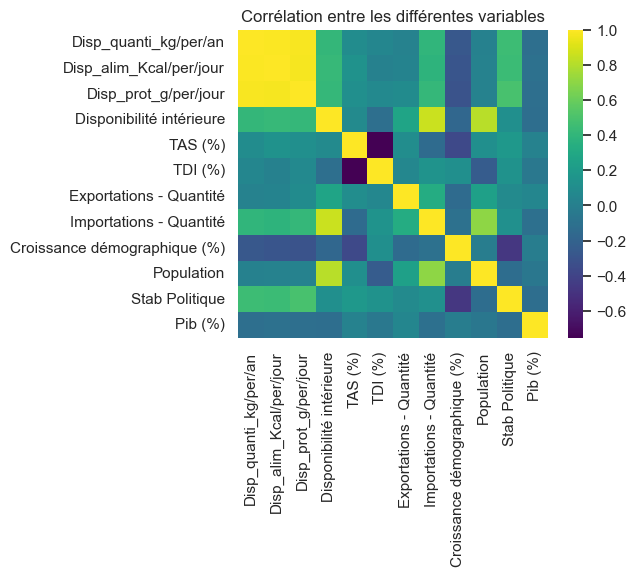

In [141]:
# heatmap de corrélations entre les différentes variables

plt.figure(figsize=(5, 4))
sns.heatmap(jointure_finale.corr(),cmap='viridis')
plt.title('Corrélation entre les différentes variables')
plt.savefig('CORRELATION DES VARIABLES ENTRE ELLES.jpg')

### 5.2 La Matrice de corrélation

In [142]:
# Afficher la matrice de corrélation

corr_df = jointure_finale.corr()
h=pd.DataFrame(corr_df)
h.head(12)

,Disp_quanti_kg/per/an,Disp_alim_Kcal/per/jour,Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Exportations - Quantité,Importations - Quantité,Croissance démographique (%),Population,Stab Politique,Pib (%)
Disp_quanti_kg/per/an,1.000000,0.989207,0.981940,0.405268,0.094001,0.050272,0.017271,0.390695,-0.273734,0.010575,0.446592,-0.117038
Disp_alim_Kcal/per/jour,0.989207,1.000000,0.974018,0.420208,0.133044,0.013920,0.031910,0.383583,-0.293881,0.024167,0.443081,-0.107138
Disp_prot_g/per/jour,0.981940,0.974018,1.000000,0.414678,0.114901,0.070751,0.083547,0.414545,-0.304830,0.022399,0.490092,-0.119160
Disponibilité intérieure,0.405268,0.420208,0.414678,1.000000,0.077822,-0.116940,0.267673,0.857535,-0.177166,0.812242,0.110830,-0.127592
TAS (%),0.094001,0.133044,0.114901,0.077822,1.000000,-0.752797,0.101912,-0.145195,-0.365252,0.113189,0.182101,0.019709
TDI (%),0.050272,0.013920,0.070751,-0.116940,-0.752797,1.000000,0.055762,0.147493,0.111110,-0.252127,0.139417,-0.052389
Exportations - Quantité,0.017271,0.031910,0.083547,0.267673,0.101912,0.055762,1.000000,0.322200,-0.143563,0.237919,0.078891,0.055032
Importations - Quantité,0.390695,0.383583,0.414545,0.857535,-0.145195,0.147493,0.322200,1.000000,-0.103109,0.702338,0.122397,-0.112419
Croissance démographique (%),-0.273734,-0.293881,-0.304830,-0.177166,-0.365252,0.111110,-0.143563,-0.103109,1.000000,-0.017650,-0.473103,-0.017606
Population,0.010575,0.024167,0.022399,0.812242,0.113189,-0.252127,0.237919,0.702338,-0.017650,1.000000,-0.135939,-0.055165


## Conclusion :

#### Le taux de dépendance à l'importation (TDI) est négativement corrélé au taux d'auto-suffisance (TAS)
#### Le taux de dépendance à l'importation (TDI) est positivement (faiblement) corrélé aux disponibilitées
#### Les pays dépendants à l'importation (TDI) sont ceux qui ont un taux d'auto-suffisance (TAS) le plus faible
#### Les pays avec un TDI important ont des disponibilités relativement faibles
#### Très forte corrélation entre les dispo alimentaire, nous decidons donc de ne garder que la dispo proteines par rapport à notre activité.

In [143]:
Data_finale = jointure_finale.loc[:,['Croissance démographique (%)','Population','Stab Politique','Pib (%)','Disp_prot_g/per/jour','Disponibilité intérieure','TAS (%)','TDI (%)']]

In [144]:
Data_finale.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%)
Zone,,,,,,,,
Afghanistan,0.247101,37171921.0,-2.53,3.0,0.54,57.0,49.122807,50.877193
Afrique du Sud,0.092891,57792518.0,-0.71,17.0,14.11,2118.0,78.706327,24.268178
Albanie,-0.009564,2882740.0,0.11,9.0,6.26,47.0,27.659574,80.851064
Algérie,0.129027,42228408.0,-0.88,6.0,1.97,277.0,99.277978,0.722022
Allemagne,0.020710,83124418.0,0.76,6.0,7.96,1739.0,87.061530,48.418631


## 6. ANALYSE EN COMPOSANTES PRINCIPALES (ACP)

In [145]:
X= Data_finale.values
X[:5]

array([[ 2.47100511e-01,  3.71719210e+07, -2.53000000e+00,
         3.00000000e+00,  5.40000000e-01,  5.70000000e+01,
         4.91228070e+01,  5.08771930e+01],
       [ 9.28910586e-02,  5.77925180e+07, -7.10000000e-01,
         1.70000000e+01,  1.41100000e+01,  2.11800000e+03,
         7.87063267e+01,  2.42681775e+01],
       [-9.56365485e-03,  2.88274000e+06,  1.10000000e-01,
         9.00000000e+00,  6.26000000e+00,  4.70000000e+01,
         2.76595745e+01,  8.08510638e+01],
       [ 1.29027243e-01,  4.22284080e+07, -8.80000000e-01,
         6.00000000e+00,  1.97000000e+00,  2.77000000e+02,
         9.92779783e+01,  7.22021661e-01],
       [ 2.07096159e-02,  8.31244180e+07,  7.60000000e-01,
         6.00000000e+00,  7.96000000e+00,  1.73900000e+03,
         8.70615296e+01,  4.84186314e+01]])

In [146]:
type(X)

numpy.ndarray

In [147]:
X.shape

(106, 8)

In [148]:
names = Data_finale.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Arabie saoudite', 'Arménie', 'Autriche', 'Azerbaïdjan',
       ...
       'Tchéquie', 'Togo', 'Turkménistan', 'Uruguay', 'Viet Nam', 'Yémen',
       'Zambie', 'Zimbabwe', 'Émirats arabes unis', 'Équateur'],
      dtype='object', name='Zone', length=106)

In [149]:
features = Data_finale.columns
features

Index(['Croissance démographique (%)', 'Population', 'Stab Politique',
       'Pib (%)', 'Disp_prot_g/per/jour', 'Disponibilité intérieure',
       'TAS (%)', 'TDI (%)'],
      dtype='object')

In [150]:
scaler = StandardScaler()

In [151]:
scaler.fit(X)

StandardScaler()

In [152]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 1.31706687,  0.67943853, -2.67762248, -0.89308062, -1.17926446,
        -0.45599184, -0.72902534,  0.32186359],
       [-0.15677411,  1.51406925, -0.60845793,  1.56123724,  1.99377953,
         2.87924094,  0.02929286, -0.38978746],
       [-1.1359745 , -0.70843612,  0.32380302,  0.15876989,  0.15823087,
        -0.47217444, -1.27919516,  1.1235068 ],
       [ 0.18859376,  0.8841028 , -0.80173155, -0.36715537, -0.84489063,
        -0.09997476,  0.55660868, -1.01952315],
       [-0.84664083,  2.53939272,  1.06279035, -0.36715537,  0.55573822,
         2.2659206 ,  0.24346286,  0.25611001]])

In [153]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [154]:
pca.explained_variance_ratio_

array([0.29399026, 0.22050836, 0.20107663, 0.1202988 , 0.07892164,
       0.05207341])

In [155]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([29.4 , 22.05, 20.11, 12.03,  7.89,  5.21])

In [156]:
scree_cum = scree.cumsum().round()
scree_cum

array([29., 51., 72., 84., 91., 97.])

In [157]:
x_list = range(1, n_components+1)
x_list_as_list = list(x_list)

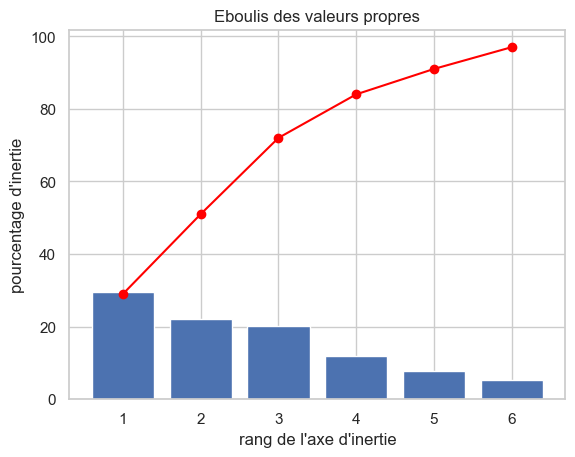

In [158]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

A partir de 4 rangs nous avec un pourcentage d'inertie de 84%, nous nous concentrerons donc sur les 4 premieres composantes.

In [159]:
pcs = pca.components_
pcs

array([[-0.39142224,  0.35504396,  0.30705845, -0.097074  ,  0.37469023,
         0.46407402,  0.40651871, -0.30985357],
       [ 0.27898776,  0.39931412, -0.54006633,  0.13311874, -0.40474723,
         0.13423483,  0.21908299, -0.47274216],
       [ 0.24765301,  0.45073875, -0.11509572, -0.20491278,  0.13084851,
         0.49978033, -0.5067274 ,  0.39571698],
       [-0.20104708,  0.10374311,  0.00299664,  0.94305771,  0.0578871 ,
         0.12011705, -0.13506511,  0.1530654 ],
       [ 0.64994018, -0.21259481, -0.05916504,  0.1668325 ,  0.67005866,
         0.01627765,  0.10651501, -0.20114327],
       [ 0.47939607,  0.21046411,  0.74950096,  0.11496487, -0.37571812,
        -0.01051271,  0.09818349,  0.00101683]])

In [160]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,-0.391422,0.355044,0.307058,-0.097074,0.374690,0.464074,0.406519,-0.309854
1,0.278988,0.399314,-0.540066,0.133119,-0.404747,0.134235,0.219083,-0.472742
2,0.247653,0.450739,-0.115096,-0.204913,0.130849,0.499780,-0.506727,0.395717
3,-0.201047,0.103743,0.002997,0.943058,0.057887,0.120117,-0.135065,0.153065
4,0.649940,-0.212595,-0.059165,0.166832,0.670059,0.016278,0.106515,-0.201143
5,0.479396,0.210464,0.749501,0.114965,-0.375718,-0.010513,0.098183,0.001017


In [161]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%)
F1,-0.39,0.36,0.31,-0.10,0.37,0.46,0.41,-0.31
F2,0.28,0.40,-0.54,0.13,-0.40,0.13,0.22,-0.47
F3,0.25,0.45,-0.12,-0.20,0.13,0.50,-0.51,0.40
F4,-0.20,0.10,0.00,0.94,0.06,0.12,-0.14,0.15
F5,0.65,-0.21,-0.06,0.17,0.67,0.02,0.11,-0.20
F6,0.48,0.21,0.75,0.11,-0.38,-0.01,0.10,0.00


In [162]:
pcs.T

,F1,F2,F3,F4,F5,F6
Croissance démographique (%),-0.391422,0.278988,0.247653,-0.201047,0.649940,0.479396
Population,0.355044,0.399314,0.450739,0.103743,-0.212595,0.210464
Stab Politique,0.307058,-0.540066,-0.115096,0.002997,-0.059165,0.749501
Pib (%),-0.097074,0.133119,-0.204913,0.943058,0.166832,0.114965
Disp_prot_g/per/jour,0.374690,-0.404747,0.130849,0.057887,0.670059,-0.375718
Disponibilité intérieure,0.464074,0.134235,0.499780,0.120117,0.016278,-0.010513
TAS (%),0.406519,0.219083,-0.506727,-0.135065,0.106515,0.098183
TDI (%),-0.309854,-0.472742,0.395717,0.153065,-0.201143,0.001017


<Axes: >

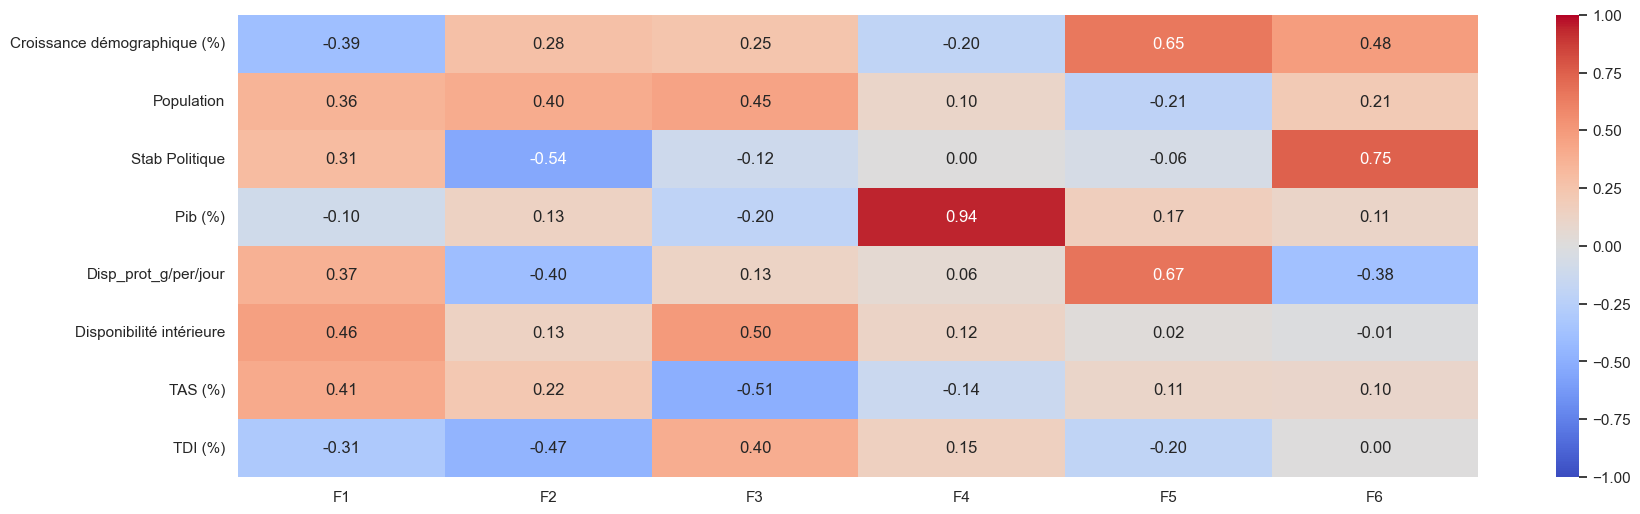

In [163]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [164]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

### 6.1 Le cercle des corrélations

In [165]:
x_y = (0,1)
x_y

(0, 1)

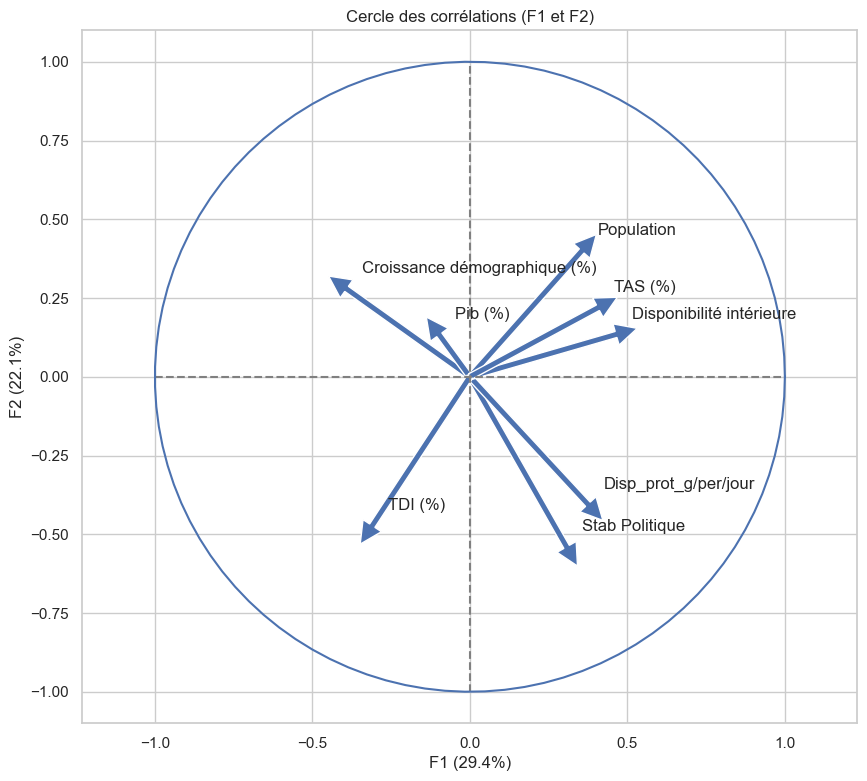

In [166]:
correlation_graph(pca, x_y, features)

In [167]:
import ipywidgets as widgets
from IPython.display import display

# Créez un bouton de zoom
zoom_button = widgets.Button(description="Zoom In")

# Créez une fonction de zoom
def zoom_in(event):
    # Insérez ici le code pour agrandir le graphique
    pass

# Attachez la fonction de zoom au bouton
zoom_button.on_click(zoom_in)

# Affichez le bouton dans la cellule
display(zoom_button)


Button(description='Zoom In', style=ButtonStyle())

<Figure size 800x800 with 0 Axes>

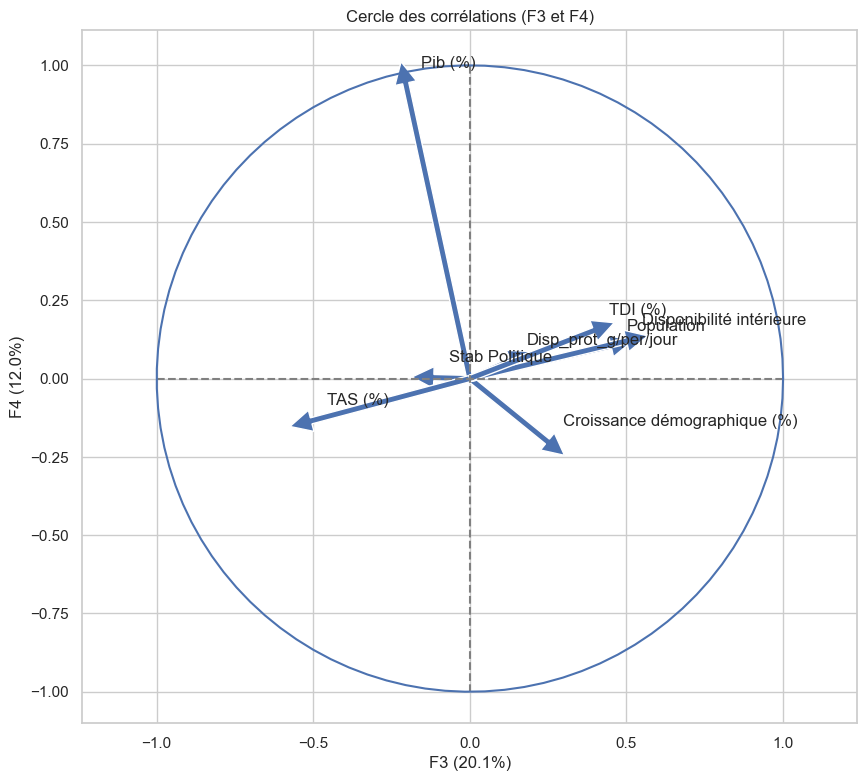

<Figure size 640x480 with 0 Axes>

In [168]:
x_y = (2,3)

plt.figure(figsize=(8, 8))  
correlation_graph(pca, x_y, features)
plt.show()  
plt.savefig('correlation_graph.jpeg') 


# Conclusion :

## Composante F1 :

La disponibilité intérieur a la plus grande contribution positive. Le TAS ainsi que la dispo en proteines ont également une contribution positive. Le TDI a la plus forte contribution négative.
La composante F1 peut etre representé par une notion de disponibilités.
En projection, les points à gauche de l'axe F1 auront des faibles dispos et un TAS faible également et à droite de F1 un TDI elevé.

## Composante F2 :
La population a une forte contribution positive ainsi que la croissance démographique.
La stabilité politique a une contribution négative importante.
La composante F2 peut etre repressenté par une notion d'evolution des populations.
En projection, les points en haut de l'axe F2 auront des croissance et une population faible et en bas de F2 une bonne stabilité politique.

## Composante F3 :

La disponibilité interieur a une contribution positive élevée.
Le TAS a une contribution négative élevée.
Le TDI a une contribution positive élevée.
La composante F3 est aussi une notion de disponibilités.
En projection, les points à gauche de l'axe F3 auront des faible dispo et une faible TDI et à droite de F3 un TAS faible.

## Composante F4 :

Le PIB a la plus grande contribution négative.
le TAS a une contribution modérée positive.
La composante F4 peut etre representé par une notion de richesse du pays.
En projection, les points en haut de l'axe F4 auront un faible TAS et en bas de F4 un PIB elevé.

### 6.2 La projections en nuage de points

In [169]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-2.05935629,  2.07018142,  1.2381946 , -1.01986033, -0.21899533,
        -0.95854565],
       [ 2.47645408,  0.86749299,  1.9245196 ,  2.05674733,  1.33702725,
        -0.80994001],
       [-0.75084194, -1.69235609,  0.20706531,  0.60277646, -0.84427671,
        -0.61167826],
       [ 0.20874514,  1.72222515, -0.2332937 , -0.58699692, -0.38259621,
         0.0054793 ],
       [ 2.87437027,  0.16645694,  2.07099959,  0.40125926, -0.83058238,
         0.67446972]])

In [170]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

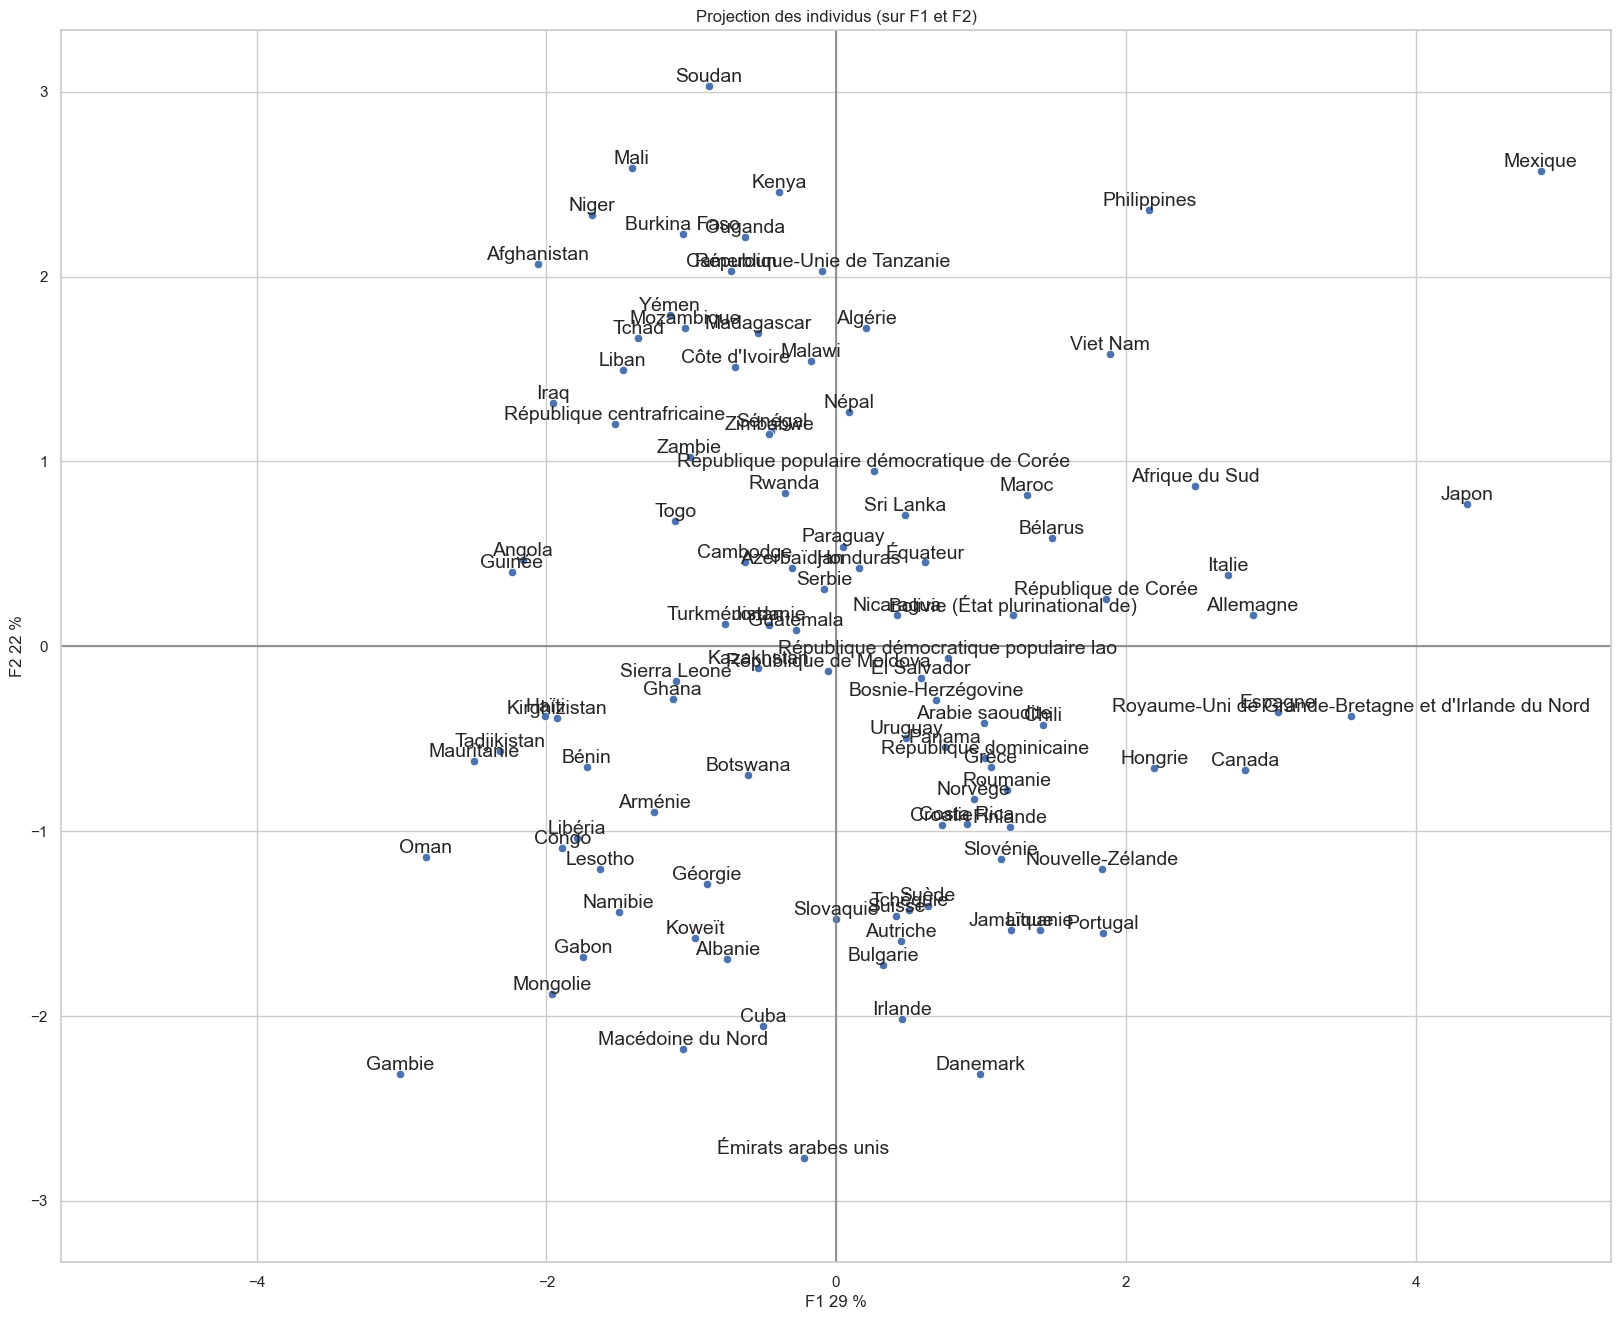

In [171]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

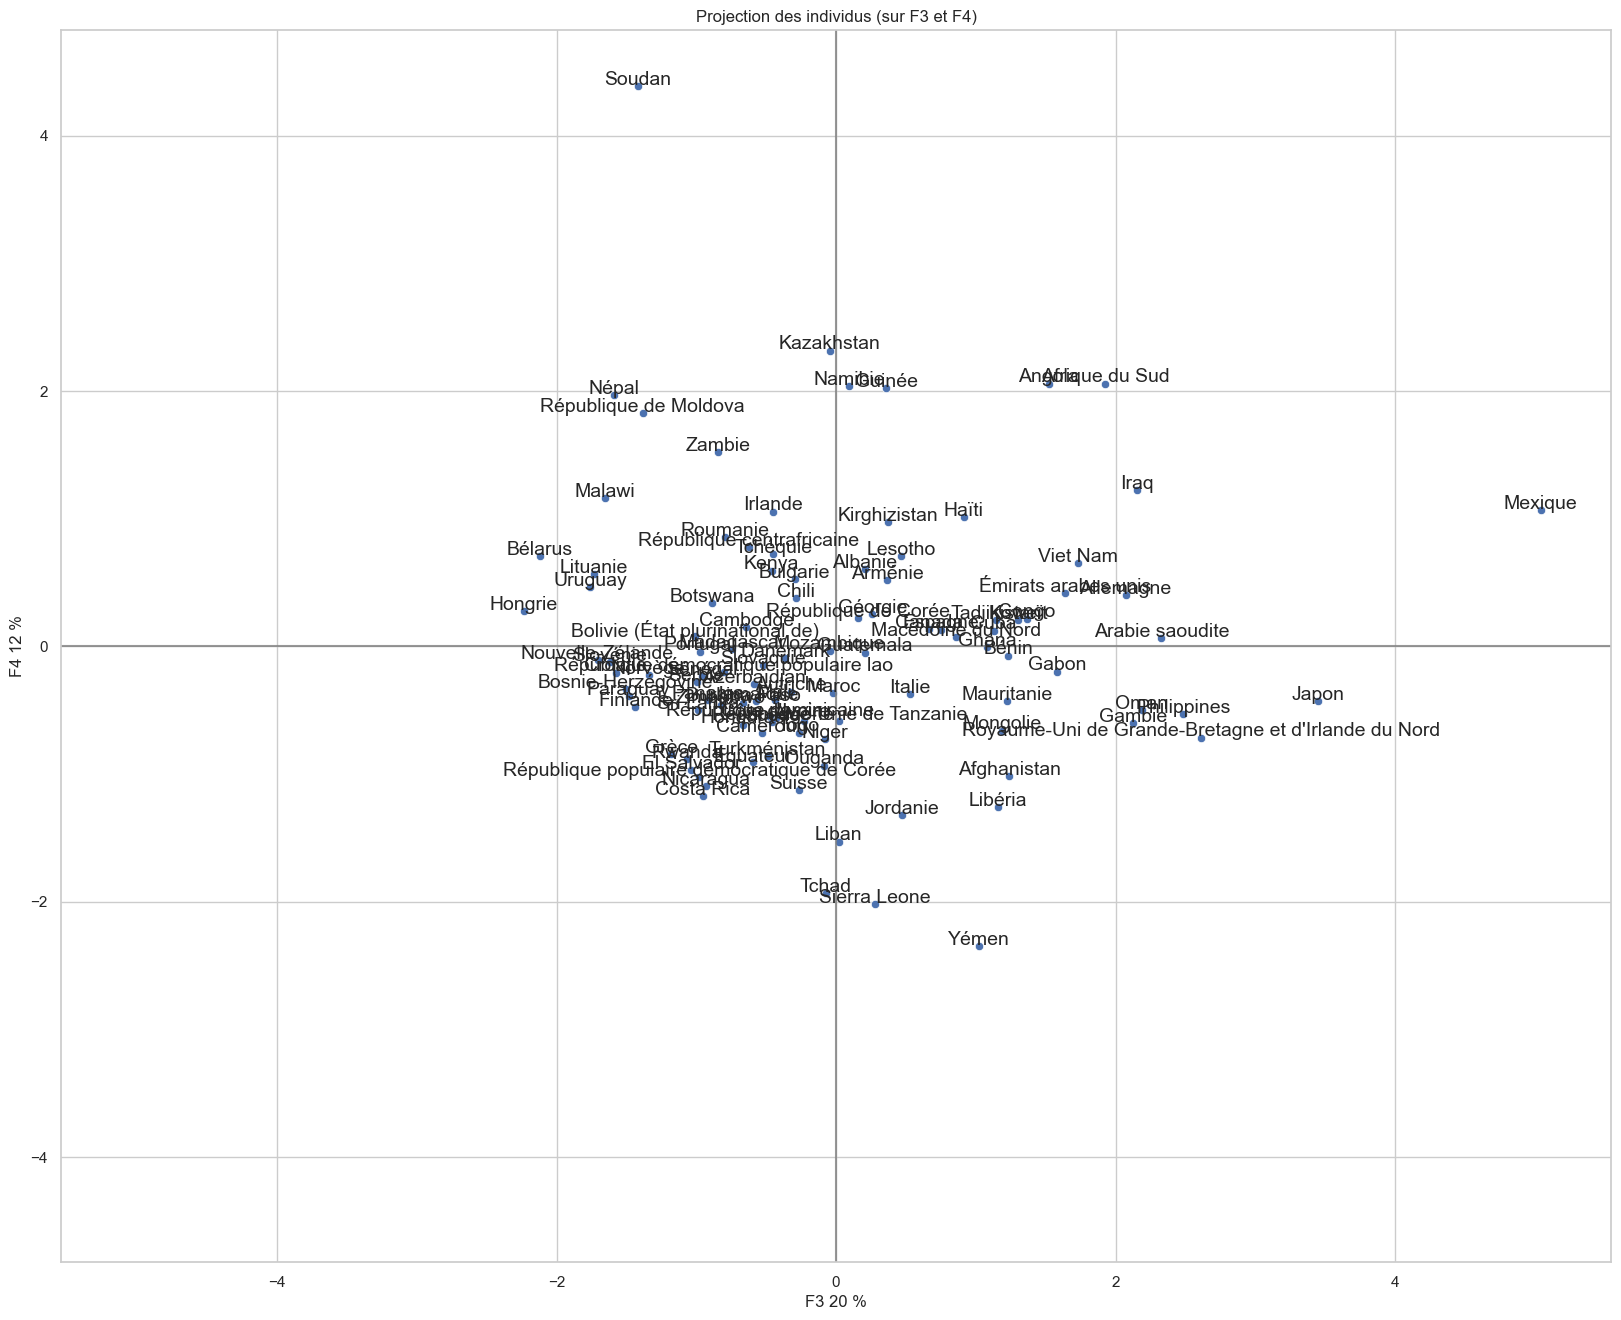

In [172]:
x_y = 2,3
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16),marker="o")

In [173]:
# Exportez le DataFrame en tant que fichier CSV
Data_finale.to_csv('Data_finale.csv')
